In [1]:
#Credits to Noah
import cv2
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')

import os
import math

In [2]:
def plot_image(img, title: str):
    plt.title(title)
    
    if img.shape[0] <= 32:
        plt.xticks(range(img.shape[0]))
        plt.yticks(range(img.shape[1]))
    
    plt.imshow(img, extent=[0, img.shape[0], img.shape[1], 0], cmap='viridis')
    plt.show()

In [3]:
def read_this(image_file, gray_scale=False):
    image_src = cv2.imread(image_file)
    if gray_scale:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)
    else:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
    return image_src

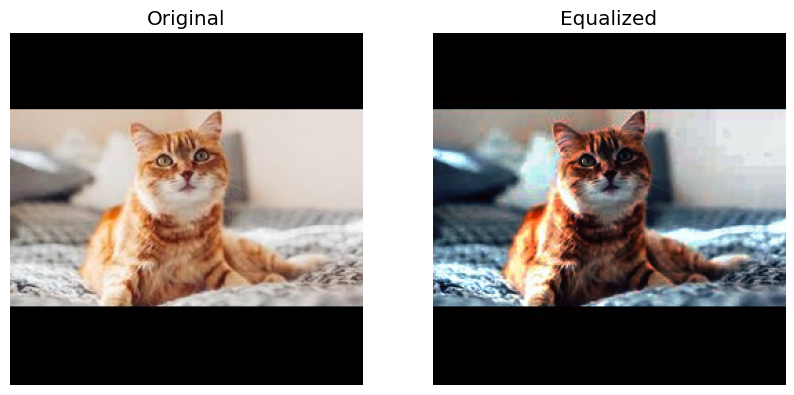

In [5]:
def equalize(image_file, with_plot=False, gray_scale=False):
    image_src = read_this(image_file=image_file, gray_scale=gray_scale)
    if not gray_scale:
        r_image, g_image, b_image = cv2.split(image_src)

        r_image_eq = cv2.equalizeHist(r_image)
        g_image_eq = cv2.equalizeHist(g_image)
        b_image_eq = cv2.equalizeHist(b_image)

        image_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))
        cmap_val = None
    else:
        image_eq = cv2.equalizeHist(image_src)
        cmap_val = 'gray'

    if with_plot:
        fig = plt.figure(figsize=(10, 20))

        ax1 = fig.add_subplot(2, 2, 1)
        ax1.axis("off")
        ax1.title.set_text('Original')
        ax2 = fig.add_subplot(2, 2, 2)
        ax2.axis("off")
        ax2.title.set_text("Equalized")

        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_eq, cmap=cmap_val)
        #return True
    return image_eq

img_eq = equalize(image_file=os.path.join("cat1.jpeg"),with_plot=True,gray_scale=False)

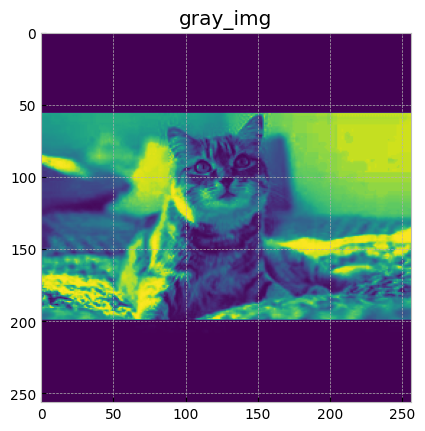

In [6]:
gray_img=cv2.cvtColor(img_eq,cv2.COLOR_BGR2GRAY)
plot_image(gray_img,"gray_img")

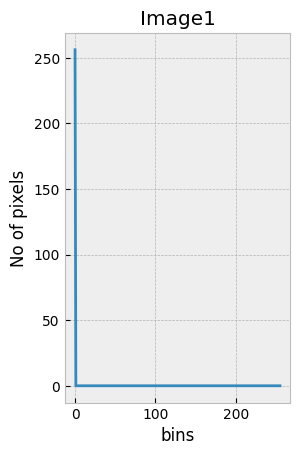

In [7]:
# calculating histograms
hist=cv2.calcHist(gray_img,[0],None,[256],[0,256])
plt.subplot(121)
plt.title("Image1")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist)
plt.show()

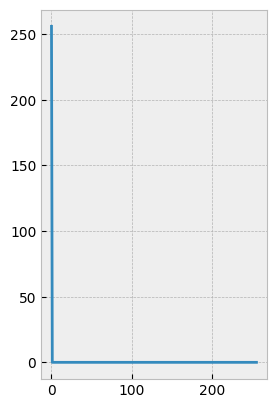

In [8]:
# equalizing histograms
gray_img_eqhist=cv2.equalizeHist(gray_img)
hist=cv2.calcHist(gray_img_eqhist,[0],None,[256],[0,256])
plt.subplot(121)
plt.plot(hist)
plt.show()

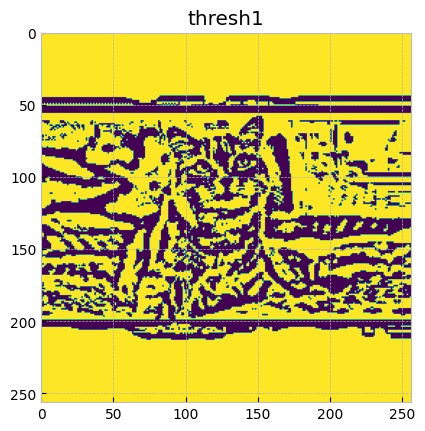

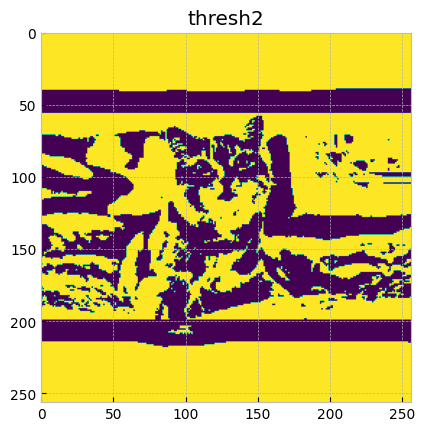

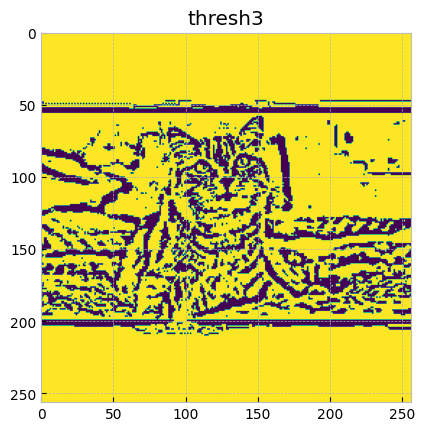

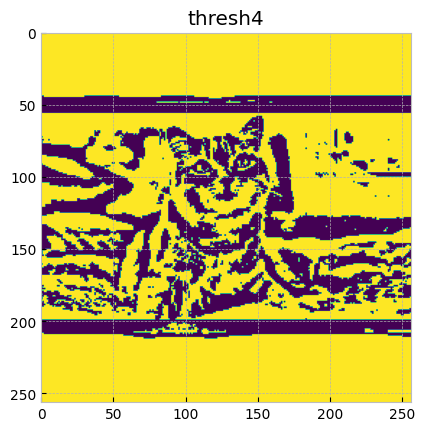

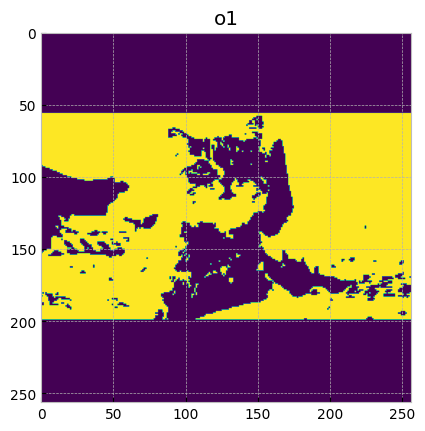

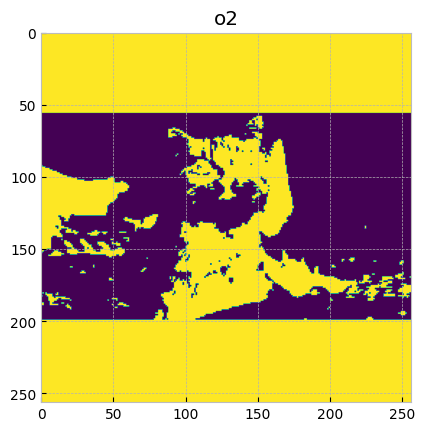

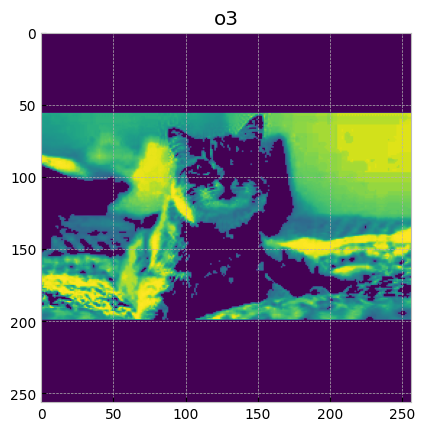

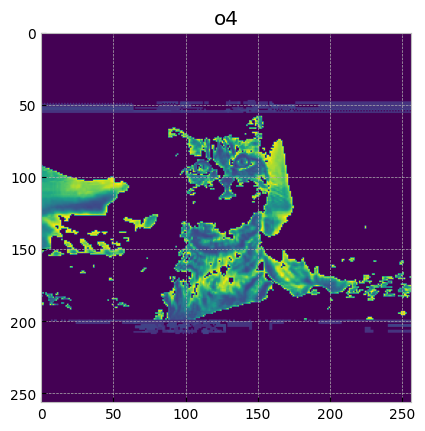

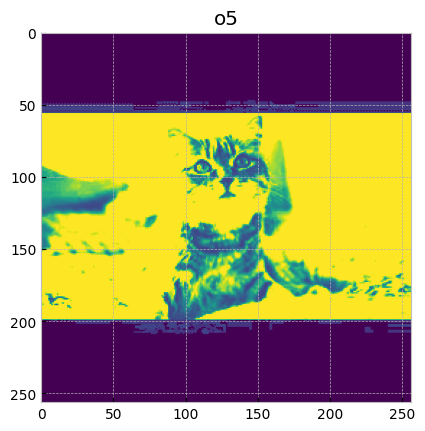

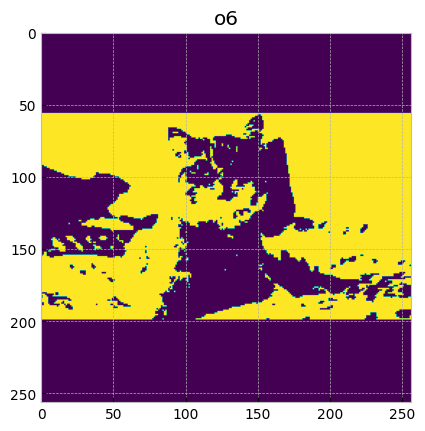

In [9]:
# thresholding
th=80
max_val=255

ret, o1 = cv2.threshold(gray_img_eqhist, th, max_val, cv2.THRESH_BINARY)
#cv2.putText(o1,"Thresh_Binary",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o2 = cv2.threshold(gray_img_eqhist, th, max_val, cv2.THRESH_BINARY_INV)
#cv2.putText(o2,"Thresh_Binary_inv",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o3 = cv2.threshold(gray_img_eqhist, th, max_val, cv2.THRESH_TOZERO)
#cv2.putText(o3,"Thresh_Tozero",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o4 = cv2.threshold(gray_img_eqhist, th, max_val, cv2.THRESH_TOZERO_INV)
#cv2.putText(o4,"Thresh_Tozero_inv",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o5 = cv2.threshold(gray_img_eqhist, th, max_val, cv2.THRESH_TRUNC)
#cv2.putText(o5,"Thresh_trunc",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret ,o6=  cv2.threshold(gray_img_eqhist, th, max_val,  cv2.THRESH_OTSU)
#cv2.putText(o6,"Thresh_OSTU",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)

# adaptive thresholding
thresh1 = cv2.adaptiveThreshold(gray_img_eqhist, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh2 = cv2.adaptiveThreshold(gray_img_eqhist, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
thresh3 = cv2.adaptiveThreshold(gray_img_eqhist, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 5)
thresh4 = cv2.adaptiveThreshold(gray_img_eqhist, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 4)

plot_image(thresh1,"thresh1")
plot_image(thresh2,"thresh2")
plot_image(thresh3,"thresh3")
plot_image(thresh4,"thresh4")

plot_image(o1, "o1")
plot_image(o2, "o2")
plot_image(o3, "o3")
plot_image(o4, "o4")
plot_image(o5, "o5")
plot_image(o6, "o6")